In [14]:
import yfinance as yf
import pandas as pd
import numpy as np

novo = yf.Ticker("NVO")

novo.history(period = "3y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-12 00:00:00-04:00,33.371405,33.486663,33.275360,33.356998,1147400,0.0,0.0
2021-04-13 00:00:00-04:00,33.866045,34.048536,33.760397,33.986103,1627200,0.0,0.0
2021-04-14 00:00:00-04:00,34.202207,34.221416,33.731576,33.880451,1913000,0.0,0.0
2021-04-15 00:00:00-04:00,34.182995,34.523960,34.182995,34.341473,1944200,0.0,0.0
2021-04-16 00:00:00-04:00,34.668031,34.773683,34.533566,34.658424,2641200,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-03 00:00:00-04:00,125.379997,128.130005,125.379997,126.989998,3616400,0.0,0.0
2024-04-04 00:00:00-04:00,126.900002,127.480003,123.769997,123.959999,4006800,0.0,0.0
2024-04-05 00:00:00-04:00,124.669998,126.169998,124.599998,125.860001,4995400,0.0,0.0


In [18]:
data = yf.download(["^GSPC", "NVO", "MSFT"], start="2021-04-08", end="2024-04-08", interval="1d")

# Selecting only the "Adj Close" prices for all symbols
data = data["Adj Close"]

# Calculate percentage change for the S&P 500 index
data['Sp500_returns'] = data['^GSPC'].pct_change() * 100

data["msft_returns"] = data["MSFT"].pct_change() * 100
data["nvo_returns"] = data["NVO"].pct_change() * 100

# Drop NaN values

data = data.dropna()


varianceMicrosoft = data["msft_returns"].var()
sdMicrosoft = np.sqrt(varianceMicrosoft)

varianceNovo = data["nvo_returns"].var()
sdNovo = np.sqrt(varianceNovo)

varianceSP500 = data["Sp500_returns"].var()
sdSp500 = np.sqrt(varianceSP500)

# Display results
print("Microsoft - Variance:", varianceMicrosoft, " Standard Deviation:", sdMicrosoft)
print("Novo - Variance:", varianceNovo, " Standard Deviation:", sdNovo)
print("S&P 500 - Variance:", varianceSP500, " Standard Deviation:", sdSp500)

[*********************100%***********************]  3 of 3 completed
Microsoft - Variance: 2.9779675682024034  Standard Deviation: 1.7256788716914868
Novo - Variance: 3.539586886118516  Standard Deviation: 1.8813789852442053
S&P 500 - Variance: 1.188950547110858  Standard Deviation: 1.0903900894225231


In [25]:
covariance_msft_sp500 = data['msft_returns'].cov(data['Sp500_returns'])
beta_msft = covariance_msft_sp500 / varianceSP500

covariance_nvo_sp500 = data['nvo_returns'].cov(data['Sp500_returns'])
beta_nvo = covariance_nvo_sp500 / varianceSP500

print("Beta for Microsoft (MSFT):", beta_msft)
print("Beta for Novo Nordisk (NVO):", beta_nvo)

Beta for Microsoft (MSFT): 1.2537342903241118
Beta for Novo Nordisk (NVO): 0.5336573638021458


In [24]:
import statsmodels.api as sm


X = sm.add_constant(data['Sp500_returns'])


y_msft = data['msft_returns']
y_nvo = data['nvo_returns']

model_msft = sm.OLS(y_msft, X, missing='drop')
results_msft = model_msft.fit()
beta_msft_ols = results_msft.params[1]


model_nvo = sm.OLS(y_nvo, X, missing='drop')
results_nvo = model_nvo.fit()
beta_nvo_ols = results_nvo.params[1]

print("Beta for Microsoft (MSFT) using OLS regression:", beta_msft_ols)
print("Beta for Novo Nordisk (NVO) using OLS regression:", beta_nvo_ols)

Beta for Microsoft (MSFT) using OLS regression: 1.2537342903241122
Beta for Novo Nordisk (NVO) using OLS regression: 0.5336573638021459


# HERFRA OLIVER


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from dataproject import *

In [2]:
# Importing monthly data from Yahoo Finance
data = yf.download(["^GSPC", "NVO", "MSFT","TSLA"], start = "2020-01-01", end = "2024-04-08", interval = "1mo")
data = data["Adj Close"] # Only look at the adjusted close

# Calculate monthly returns
data['sp500_returns'] = data['^GSPC'].pct_change() * 100 
data["msft_returns"] = data["MSFT"].pct_change() * 100
data["TSLA_returns"] = data["TSLA"].pct_change() * 100
data["nvo_returns"] = data["NVO"].pct_change() * 100
data = data.dropna() # First observation which is NA

# print(data.tail())

[*********************100%***********************]  4 of 4 completed


In [3]:
# Keep returns of Microsoft and Novo
#print(data.iloc[:,[7,5,6]])
returns = data.iloc[:, [5,6,7]]

# Calculate the average return over the period
return_matrix = np.mean(returns, axis = 0)
print(return_matrix)

msft_returns    2.105357
TSLA_returns    4.911452
nvo_returns     3.117391
dtype: float64


In [4]:
# Calculate covariance matrix
cov_matrix = returns.cov()
print(cov_matrix)
print("\n")

# Prints volatility
print(np.sqrt(cov_matrix))

              msft_returns  TSLA_returns  nvo_returns
msft_returns     42.661935     78.973008    20.287921
TSLA_returns     78.973008    491.452159    -3.505344
nvo_returns      20.287921     -3.505344    36.605325


              msft_returns  TSLA_returns  nvo_returns
msft_returns      6.531610      8.886676     4.504211
TSLA_returns      8.886676     22.168720          NaN
nvo_returns       4.504211           NaN     6.050233


c:\Users\Asger Nielsen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [5]:
def portfolio(w, return_matrix=return_matrix, cov_matrix=cov_matrix):
    '''Calculate expected returns and volatility (standard deviation) for given portfolio weights'''
    W = pd.DataFrame([w, 1-w,2-w], index=[return_matrix.index[0], return_matrix.index[1],return_matrix.index[2]]) # Creates weights, gives same index at return matrix
    tW = W.transpose() # Transposes weights
    var = tW.dot(cov_matrix).dot(W) # Formula for variance of portfolio
    sd = np.sqrt(var)[0][0] # take the square root
    e_r = tW.dot(return_matrix)[0] # Calculate the expected return
    return e_r, sd

In [6]:
w_min = mvp_w(100, portfolio)
print(f'Minimum variance weights: w1 = {w_min:.3f}, w2 = {1 - w_min:.3f}\n')

mvp = portfolio(w_min)
print(f'MVP return = {mvp[0]:.3f}, MVP volatility = {mvp[1]:.3f}')

Minimum variance weights: w1 = 1.182, w2 = -0.182

MVP return = 4.146, MVP volatility = 10.328


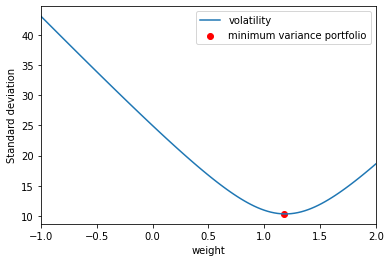

In [7]:
plot_variance(portfolio)

In [8]:
w_etp = etp_w(100, portfolio)
print(f'Efficient tangent portfolio weights: w1 = {w_etp:.3f}, w2 = {1 - w_etp:.3f}\n')

etp = portfolio(w_etp)
print(f'ETP return = {etp[0]:.3f}, ETP volatility = {etp[1]:.3f}')

Efficient tangent portfolio weights: w1 = 0.758, w2 = 0.242

ETP return = 6.659, ETP volatility = 13.227


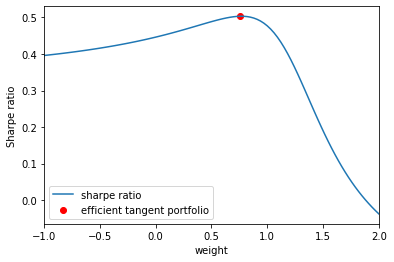

In [9]:
plot_sharp(portfolio)

In [10]:
# Weights for the MVP and ETP
mvp_weights = pd.DataFrame([w_min, 1 - w_min])
etp_weights = pd.DataFrame([w_etp, 1 - w_etp])

# Creating y_vec and lin_vec to store linear combinations
y_vec = np.linspace(-3, 3, 100)
lin_vec = []

for y in y_vec:
    linear = y*mvp_weights + (1-y)*etp_weights
    lin_vec.append(linear[0][0])

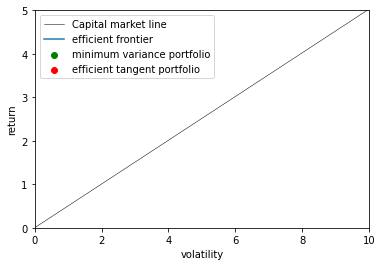

In [11]:
plot_capm(mvp, etp, lin_vec, portfolio)

In [12]:
import numpy as np
df = pd.read_excel('Fama-French.xlsx') # Datasæt med returns for markedsporteføljen og risk free bonds
df.columns = ['Date'] + list(df.columns[1:])
df.set_index("Date", inplace=True)

newdf = df[len(df)-len(data)+2:]
newdata = data[:-2]
newdf.index = pd.to_datetime(newdf.index, format='%Y%m')
newdata['Mkt-RF'] = newdf['Mkt-RF']
newdata['RF'] = newdf['RF']


C:\Users\Asger Nielsen\AppData\Local\Temp\ipykernel_20200\2366787023.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Mkt-RF'] = newdf['Mkt-RF']
C:\Users\Asger Nielsen\AppData\Local\Temp\ipykernel_20200\2366787023.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['RF'] = newdf['RF']


In [ ]:
novoMriskfree = []
microMriskfree = []
teslaMriskfree = []
#print(newdata['nvo_returns'])

for index, row in newdata.iterrows():
        nvo_return = row['nvo_returns']
        microsoft_return = row['msft_returns']
        tesla_return = row['TSLA_returns']
        risk_free = row['RF']
        novoMriskfree.append(nvo_return - risk_free)
        microMriskfree.append(microsoft_return-risk_free)
        teslaMriskfree.append(tesla_return)

cov_matrix_novo = np.cov(novoMriskfree, newdata['sp500_returns'])
B_i_novo = cov_matrix_novo[0, 1] / cov_matrix_novo[1, 1]
print("Beta for Novo:", B_i_novo)

cov_matrix_microsoft = np.cov(microMriskfree, newdata['sp500_returns'])
B_i_microsoft = cov_matrix_microsoft[0, 1] / cov_matrix_microsoft[1, 1]
print("Beta for Microsoft:", B_i_microsoft)

cov_matrix_tesla = np.cov(teslaMriskfree, newdata['sp500_returns'])
B_i_tesla = cov_matrix_tesla[0, 1] / cov_matrix_tesla[1, 1]
print("Beta for tesla:", B_i_tesla)